Em 23/12/2019 alguns perfis do Twitter com alto engajamento pareceram ter percebido que as manchetes dos principais portais de jornais deixaram de incluir o sobrenome de Flávio Bolsonaro, começando a adotar a prática de referenciá-lo por nomes como *Flávio B* ou, aproveitando a intimidade construída no decorrer do ano, simplesmente por *Flávio*.

Marcelo Soares (@msoares) abriu alguns dados que coletou desde o primeiro semestre em uma planilha do Google Sheets (https://docs.google.com/spreadsheets/d/19KbEXQGnXEz_ckAdLjXTOVgC7WLrgMXhpm2-N0WPU_4/edit#gid=0) e analisou os dados para chegar à conclusão de que não houve mudança significativa.

Entretanto, após refletir sobre sua pesquisa, e analisando especialmente as manchetes das reportagens, este autor cogitou algumas hipóteses que poderiam ser testadas a partir de um escrutínio maior da citada base.

In [7]:
%matplotlib inline
import pandas as pd
import datetime

In [12]:
df = pd.read_csv("Flávio com e sem Bolsonaro - notícias.csv", dtype={"Site":str,
                                                                    "Título":str,
                                                                    "URL":str,
                                                                    "bolsonaro":str})

df.drop(labels = ["caracteres total", "palavras total", "caracteres sem nome", "palavras sem nome"], axis=1, inplace=True)
df.Mês = pd.to_datetime(df.Mês)
df.Dia = pd.to_datetime(df.Dia)
                                                                     
                                                                     
df.bolsonaro = df.bolsonaro.map({"Não":False, "Sim":True})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
Site         543 non-null object
Título       543 non-null object
URL          543 non-null object
Dia          543 non-null datetime64[ns]
Mês          543 non-null datetime64[ns]
bolsonaro    543 non-null bool
dtypes: bool(1), datetime64[ns](2), object(3)
memory usage: 21.9+ KB


Disclaimer: Ao avançar a análise do dataset pude perceber a existência de falsos positivos, então devemos limpá-lo agora.

Este Notebook não representa, necessariamente, um processo de trabalho feito linearmente.

In [13]:
def drop_por_titulo(manchete):
    """
    Recebe uma lista de manchetes.
    Elimina a linha da tabela de acordo com a manchete presente na coluna `Título`.
    """
    for item in manchete:
        df.drop(index=df[df.Título == item].index[0],
                inplace=True)

In [14]:
#Os Flávios destas linhas não correspondem ao Flávio de interesse.

drop_por_titulo(["Marcelo Araujo substitui Flávio Pinheiro na direção do Instituto Moreira Salles",
                 "Flávio Dino quer assumir gestão dos lençóis maranhenses"])

## Limpeza dos Dados

As entradas abaixo são de notícias que possivelmente foram publicadas, deletadas e republicadas com o nome ligeiramente diferente. Seguem alguns exemplos:

```
 "Flávio Bolsonaro diz que investigação do MP sobre 'caso Queiroz' é ilegal e vê perseguição contra ele"
 "Flávio Bolsonaro diz que investigação do MP sobre 'caso Queiroz' é ilegal e vê 'perseguição implacável' contra ele"
 
 'Justiça autoriza quebra de sigilo de Flávio Bolsonaro e Queiroz'
 'Justiça autoriza quebra de sigilo do senador Flávio Bolsonaro e do ex-assessor Fabricio Queiroz'

 'Patrimônio de Flávio Bolsonaro aumentou 397,1% em doze anos'
 'Patrimônio de Flávio Bolsonaro aumentou 397,1% em 12 anos'
 
 'Defesa de Queiroz tentará suspender quebras de sigilo e investigação que envolve Flávio Bolsonaro'
 'Defesa de Queiroz tenta suspender quebras de sigilo e investigação que envolve Flávio Bolsonaro'
 
 'MP investigará parentes de ex-mulher de Bolsonaro nomeados nos gabinetes dele e de Flávio'
 'MP investigará parentes de ex-mulher de Bolsonaro nomeados por ele e Flávio'
 
 'Carta distribuída por Bolsonaro é estratégia populista e cria cortina de fumaça para denúncias contra Flávio, dizem analistas'
 'Texto divulgado por Bolsonaro é estratégia populista e cria cortina de fumaça para denúncias contra Flávio, dizem analistas'
 
 'Defesa de Queiroz tentará suspender quebras de sigilo e investigação que envolve Flávio Bolsonaro'
 'Defesa de Queiroz tenta suspender quebras de sigilo e investigação que envolve Flávio Bolsonaro'
 
 "Confio no Flávio', diz Onyx Lorenzoni sobre quebra de sigilo do senador"
 "Confio no Flávio', diz Onyx Lorenzoni sobre quebra de sigilo bancário e fiscal do senador"
 
 'A discrição de Flávio no Senado após ter digilo quebrado'
 'A discrição de Flávio no Senado após ter sigilo quebrado'
 
 'Pacto Federativo será apresentado pelo Senado, afirma Flávio Bolsonaro'
 'PEC do Pacto Federativo será apresentada pelo Senado, diz Flávio Bolsonaro'
 
 'Julgamento de HC de Flávio Bolsonaro foi retirado de pauta, diz advogado'
 'Após decisão de Toffoli, julgamento de HC de Flávio Bolsonaro é retirado de pauta'
 
 "Bolsonaro diz que Flávio tem 'problemas potencializados' por ser seu filho"
 "Após decisão de Toffoli, Bolsonaro diz que Flávio tem 'problemas potencializados' por ser seu filho"
 
 "Em reunião, Flávio Bolsonaro fala em 'independência' em relação a Witzel e cita prefeituras prioritárias para o PSL em 2020"
 "Flávio Bolsonaro fala em 'independência' em relação a Witzel e cita prefeituras prioritárias para o PSL em 2020"
 
 'Após ruptura com Witzel, Flávio articula encontro com secretário do Tesouro Nacional e se diz favorável à manutenção do Regime de Recuperação Fiscal'
 'Após ruptura com Witzel, Flávio se diz favorável à manutenção do Regime de Recuperação Fiscal'
 
 "MP tem nova investigação sobre 'rachadinha' em gabinete de Flávio Bolsonaro"
 "MP tem nova investigação sobre 'funcionário fantasma' em gabinete de Flávio Bolsonaro"
 
 'Quais são as suspeitas que pairam sobre Flávio Bolsonaro, Fabrício Queiroz e outros assessores'
 'Entenda as suspeitas que pairam sobre Flávio Bolsonaro, Fabrício Queiroz e outros assessores'
 
 'Bolsonaro ataca MP e juiz responsável por quebra de sigilo após ação contra ex-assessores de Flávio'
 "Bolsonaro compara Flávio a Neymar e ataca juiz: 'Ele quebra 93 sigilos em cinco linhas?'"
 
 "A questão do MP. Tá sendo um abuso', diz Bolsonaro sobre caso Flávio"
 'Bolsonaro diz que há abuso na investigação de Flávio e defende controle do MP'
 "Bolsonaro defende controle do MP e diz que há abuso no caso Flávio: 'Se eu não tiver a cabeça no lugar, eu alopro'"
 
```

O autor decidiu por eliminar uma ocorrência de cada par, durante o processo de limpeza de dados, afim de trabalhar com a maior quantidade de notícias únicas.

---

Existem várias formas de identificar entradas duplicadas também, como podemos observar:

Neste primeiro momento optou-se por admitir que a última parte da URL das páginas d'*O Globo* servem como identificadores únicos e, assim, são úteis para identificar caso a página tenha sido atualizada depois da primeira publicação.

Foi utilizada a confirmação manual de várias páginas para assegurar a metodologia.

In [15]:
ids_unicos = []
for item in df[df.Site == "O Globo"].URL.str.split("-"):
    ids_unicos.append(item[-1])

for item in ids_unicos:
    if ids_unicos.count(item) != 1:
        titulo = df[df.URL.str.contains(item)].Título.values
        urls = df[df.URL.str.contains(item)].URL.values
        for key, value in set(zip(titulo,urls)):
            print(key + "\n" + value + "\n" + "-")

Flávio e pai retomam ofensiva contra MP do Rio
https://oglobo.globo.com/brasil/flavio-pai-retomam-ofensiva-contra-mp-do-rio-23660520
-
Flávio Bolsonaro diz que investigação do MP sobre 'caso Queiroz' é ilegal e vê 'perseguição implacável' contra ele
https://oglobo.globo.com/brasil/flavio-bolsonaro-diz-que-investigacao-do-mp-sobre-caso-queiroz-ilegal-ve-perseguicao-implacavel-contra-ele-23660520
-
Flávio Bolsonaro diz que investigação do MP sobre 'caso Queiroz' é ilegal e vê perseguição contra ele
https://oglobo.globo.com/brasil/flavio-bolsonaro-diz-que-investigacao-do-mp-sobre-caso-queiroz-ilegal-ve-perseguicao-contra-ele-23660520
-
Flávio e Bolsonaro retomam ofensiva contra MP do Rio
https://oglobo.globo.com/brasil/flavio-bolsonaro-retomam-ofensiva-contra-mp-do-rio-23660520
-
Flávio e pai retomam ofensiva contra MP do Rio
https://oglobo.globo.com/brasil/flavio-pai-retomam-ofensiva-contra-mp-do-rio-23660520
-
Flávio Bolsonaro diz que investigação do MP sobre 'caso Queiroz' é ilegal e v

Flávio Bolsonaro nega relação com Queiroz e diz que ex-assessor reclama em aúdio acesso a cargos
https://oglobo.globo.com/brasil/flavio-bolsonaro-nega-relacao-com-queiroz-diz-que-ex-assessor-reclama-em-audio-acesso-cargos-24040175
-
Flávio Bolsonaro nega relação com Queiroz e diz que ex-assessor reclama em aúdio sobre cargos
https://oglobo.globo.com/brasil/flavio-bolsonaro-nega-relacao-com-queiroz-diz-que-ex-assessor-reclama-em-audio-sobre-cargos-24040175
-
Flávio Bolsonaro deixa o PSL e apoia criação de novo partido
https://oglobo.globo.com/brasil/flavio-bolsonaro-deixa-psl-apoia-criacao-de-novo-partido-24076994
-
Flávio Bolsonaro deixa o PSL para apoiar campanha de criação de novo partido
https://oglobo.globo.com/brasil/flavio-bolsonaro-deixa-psl-para-apoiar-campanha-de-criacao-de-novo-partido-24076994
-
Flávio Bolsonaro deixa o PSL e apoia criação de novo partido
https://oglobo.globo.com/brasil/flavio-bolsonaro-deixa-psl-apoia-criacao-de-novo-partido-24076994
-
Flávio Bolsonaro deix

In [16]:
drop_por_titulo([
    "Flávio Bolsonaro diz que investigação do MP sobre 'caso Queiroz' é ilegal e vê 'perseguição implacável' contra ele",
    'Justiça autoriza quebra de sigilo do senador Flávio Bolsonaro e do ex-assessor Fabricio Queiroz',
    'Patrimônio de Flávio Bolsonaro aumentou 397,1% em 12 anos',
    'MP investigará parentes de ex-mulher de Bolsonaro nomeados por ele e Flávio',
    'Texto divulgado por Bolsonaro é estratégia populista e cria cortina de fumaça para denúncias contra Flávio, dizem analistas',
    'Funcionária do gabinete de Flávio Bolsonaro contrata filha e irmã no Senado',
    'Desembargador suspende quebra de sigilo bancário de empresa que fez negócios imobiliários com Flávio Bolsonaro, diz jornal',
    'Flávio Bolsonaro diz que Senado deve debater inclusão de estados e municípios na reforma',
    'Ministério Público investiga contas eleitorais de Flávio Bolsonaro</a',
    'Seis pontos para entender a decisão de Toffoli e como ela pode beneficiar Flávio Bolsonaro',
    'Deputado cita Flávio Bolsonaro e cobra fim de manifestações artísticas nas barcas',
    "Nome indicado por Flávio Bolsonaro para PGR classificou democracia como 'verdadeiro embuste'",
    "Bolsonaro diz que Queiroz eximiu Flávio em depoimento por escrito e o chama de 'nota dez'",
    'Diálogos revelam que Queiroz demitiu ex-mulher de miliciano para blindar Flávio Bolsonaro',
    'Além de Flávio Bolsonaro, PSL inclui Eduardo na CPI das Fake News',
    'Joice Hasselmann diz que assessores de Carlos, Eduardo e Flávio Bolsonaro atuam com perfis falsos nas redes',
    'Joice diz que assessores de Carlos, Eduardo e Flávio Bolsonaro atuam com perfis falsos dentro do Planalto',
    'Flávio Bolsonaro nega relação com Queiroz e diz que ex-assessor reclama em aúdio acesso a cargos',
    'Flávio Bolsonaro deixa o PSL para apoiar campanha de criação de novo partido',
    "Apesar de caso Queiroz, Flavio Bolsonaro pode assumir presidência do 'Aliança pelo Brasil'",
    "MP tem nova investigação sobre 'funcionários fantasmas' em gabinete de Flávio Bolsonaro",
    "Flávio Bolsonaro usou imóveis para lavagem de R$ 638,4 mil obtidos com 'rachadinha', diz MP",
    'Flávio Bolsonaro ataca MP, juiz do caso Queiroz e filha do magistrado',
    'Flávio e Bolsonaro retomam ofensiva contra MP do Rio',
    "MP rebate acusações de Flávio Bolsonaro sobre 'ilegalidade' na investigação do caso Queiroz",
    'Defesa de Queiroz tenta suspender quebras de sigilo e investigação que envolve Flávio Bolsonaro',
    "Confio no Flávio', diz Onyx Lorenzoni sobre quebra de sigilo bancário e fiscal do senador",
    'A discrição de Flávio no Senado após ter sigilo quebrado',
    'PEC do Pacto Federativo será apresentada pelo Senado, diz Flávio Bolsonaro',
    'Após decisão de Toffoli, julgamento de HC de Flávio Bolsonaro é retirado de pauta',
    "Após decisão de Toffoli, Bolsonaro diz que Flávio tem 'problemas potencializados' por ser seu filho",
    "Flávio Bolsonaro fala em 'independência' em relação a Witzel e cita prefeituras prioritárias para o PSL em 2020",
    'Após ruptura com Witzel, Flávio se diz favorável à manutenção do Regime de Recuperação Fiscal',
    "MP tem nova investigação sobre 'funcionário fantasma' em gabinete de Flávio Bolsonaro",
    'Entenda as suspeitas que pairam sobre Flávio Bolsonaro, Fabrício Queiroz e outros assessores',
    "Bolsonaro compara Flávio a Neymar e ataca juiz: 'Ele quebra 93 sigilos em cinco linhas?'",
    "Bolsonaro defende controle do MP e diz que há abuso no caso Flávio: 'Se eu não tiver a cabeça no lugar, eu alopro'",
    "Flávio e pai retomam ofensiva contra MP do Rio",
    "Bolsonaro diz que há abuso na investigação de Flávio e defende controle do MP",
    "A questão do MP. Tá sendo um abuso', diz Bolsonaro sobre caso Flávio"
])

In [17]:
df[df.duplicated(subset="Título", keep=False)]

,Site,Título,URL,Dia,Mês,bolsonaro
65,O Globo,Bolsonaro fala sobre quebra de sigilo de filho...,https://oglobo.globo.com/brasil/bolsonaro-fala...,2019-05-16,2019-05-01,True
66,O Globo,Bolsonaro fala sobre quebra de sigilo de filho...,https://oglobo.globo.com/brasil/bolsonaro-fala...,2019-05-16,2019-05-01,True
260,O Globo,"Bolsonaro já está no quarto e de bom humor, di...",https://oglobo.globo.com/brasil/bolsonaro-ja-e...,2019-09-08,2019-09-01,True
261,Valor,"Bolsonaro já está no quarto e de bom humor, di...",http://www.valor.com.br/politica/6426255/bolso...,2019-09-08,2019-09-01,True
273,O Globo,MP do Rio defende foro especial para Flávio Bo...,https://oglobo.globo.com/brasil/mp-do-rio-defe...,2019-09-17,2019-09-01,True
277,Veja,MP do Rio defende foro especial para Flávio Bo...,https://veja.abril.com.br/politica/mp-do-rio-d...,2019-09-17,2019-09-01,True
325,O Globo,Bivar evita falar sobre possível destituição d...,https://oglobo.globo.com/brasil/bivar-evita-fa...,2019-10-17,2019-10-01,True
326,O Globo,Bivar evita falar sobre possível destituição d...,https://oglobo.globo.com/brasil/bivar-evita-fa...,2019-10-17,2019-10-01,True
367,O Globo,"No lugar de Flávio Bolsonaro, aliado de Witzel...",https://oglobo.globo.com/brasil/no-lugar-de-fl...,2019-11-19,2019-11-01,True
368,O Globo,"No lugar de Flávio Bolsonaro, aliado de Witzel...",https://oglobo.globo.com/brasil/no-lugar-de-fl...,2019-11-19,2019-11-01,True


Eliminaremos as entradas duplicadas de acordo com o título também:

In [18]:
df.drop_duplicates(subset="Título", keep='last', inplace=True)
df.info()
df.reset_index(inplace=True, drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 542
Data columns (total 6 columns):
Site         489 non-null object
Título       489 non-null object
URL          489 non-null object
Dia          489 non-null datetime64[ns]
Mês          489 non-null datetime64[ns]
bolsonaro    489 non-null bool
dtypes: bool(1), datetime64[ns](2), object(3)
memory usage: 23.4+ KB


A primeira hipótese que diferenciaria minha análise da feita por Marcelo é a de que há uma variedade maior de conjuntos analisáveis.

Enquanto o autor original cria dois conjuntos que não interseccionam (*Títulos que **contém** "Bolsonaro"* vs *Títulos que **não contém** "Bolsonaro"*), acredito que, diante da variedade dos títulos presentes, podemos diversificar ainda mais os conjuntos afim de analisá-los de maneira mais minunciosa.

Podemos observar a existência dos conjuntos:

1. *Títulos que **não contém** "Bolsonaro"*

2. *Títulos que **contém** "Bolsonaro"*

    2.1. Títulos que **contém** "Bolsonaro" adjacente ao nome *Flávio*

    2.2 Títulos que **contém** "Bolsonaro", porém separado de *Flávio*
    
Criaremos os grupos e exemplos serão demonstrados em seguida:

In [19]:
#O data frame bolso_junto possui todas as ocorrências onde há a ocorrência do nome da família do Presidente.

df_com_bolso = df[df.Título.str.contains("Bolsonaro")]
df_com_bolso

,Site,Título,URL,Dia,Mês,bolsonaro
0,R7,Projeto de Flávio Bolsonaro livra de punição a...,http://noticias.r7.com/brasil/projeto-de-flavi...,2019-04-19,2019-04-01,True
1,R7,Bolsonaro almoça em Brasília para comemorar an...,http://noticias.r7.com/brasil/bolsonaro-almoca...,2019-04-28,2019-04-01,True
2,O Globo,Flávio Bolsonaro acusa PT de colaborar com con...,https://oglobo.globo.com/mundo/flavio-bolsonar...,2019-05-02,2019-05-01,True
3,O Globo,Quatro assessores de Flávio Bolsonaro apontado...,https://epoca.globo.com/quatro-assessores-de-f...,2019-05-02,2019-05-01,True
4,Veja,Conflito armado não resolveria crise na Venezu...,https://veja.abril.com.br/mundo/conflito-armad...,2019-05-02,2019-05-01,True
...,...,...,...,...,...,...
483,Valor,Bolsonaro vê abuso do Ministério Público no ca...,https://valor.globo.com/politica/noticia/2019/...,2019-12-21,2019-12-01,True
484,Congresso em Foco,"“Se eu não tiver cabeça no lugar, eu alopro”, ...",https://congressoemfoco.uol.com.br/governo/se-...,2019-12-21,2019-12-01,True
485,R7,Bolsonaro se irrita com perguntas sobre Flávio...,http://noticias.r7.com/brasil/bolsonaro-se-irr...,2019-12-21,2019-12-01,True
486,O Globo,"Sócio de Flávio Bolsonaro, apontado como possí...",https://oglobo.globo.com/brasil/socio-de-flavi...,2019-12-22,2019-12-01,True


In [20]:
# O data frame `bolso_junto`, por sua vez, é um subconjunto do dataframe df_com_bolso.
# Este possui todas as ocorrências onde o senador é mencionado pelo nome e sobrenome.

bolso_junto = df_com_bolso[df_com_bolso.Título.str.contains("Flávio Bolsonaro")]
bolso_junto

,Site,Título,URL,Dia,Mês,bolsonaro
0,R7,Projeto de Flávio Bolsonaro livra de punição a...,http://noticias.r7.com/brasil/projeto-de-flavi...,2019-04-19,2019-04-01,True
2,O Globo,Flávio Bolsonaro acusa PT de colaborar com con...,https://oglobo.globo.com/mundo/flavio-bolsonar...,2019-05-02,2019-05-01,True
3,O Globo,Quatro assessores de Flávio Bolsonaro apontado...,https://epoca.globo.com/quatro-assessores-de-f...,2019-05-02,2019-05-01,True
4,Veja,Conflito armado não resolveria crise na Venezu...,https://veja.abril.com.br/mundo/conflito-armad...,2019-05-02,2019-05-01,True
5,O Globo,Flávio Bolsonaro e Paulo Marinho perto de romper,https://epoca.globo.com/guilherme-amado/flavio...,2019-05-06,2019-05-01,True
...,...,...,...,...,...,...
476,R7,MP: 'Rachadinha' bancou imóveis e loja de doce...,http://noticias.r7.com/brasil/mp-rachadinha-ba...,2019-12-20,2019-12-01,True
477,R7,"Vazam caso para me desgastar e atingirmeu pai,...",http://noticias.r7.com/brasil/vazam-caso-para-...,2019-12-20,2019-12-01,True
482,Veja,O que Flávio Bolsonaro e Carlos Alberto Parrei...,https://veja.abril.com.br/blog/maquiavel/o-que...,2019-12-21,2019-12-01,True
486,O Globo,"Sócio de Flávio Bolsonaro, apontado como possí...",https://oglobo.globo.com/brasil/socio-de-flavi...,2019-12-22,2019-12-01,True


In [21]:
# A expressão regular "Flávio\s(?!Bolsonaro)" deve encontrar todos os títulos que contém o nome Flávio *não* adjacente ao sobrenome Bolsonaro.
# Ex: "Flávio pede fim de apuração e diz que pode ter errado por 'confiar demais' em Queiroz"

# Pode ser que exista a menção ao pai neste caso, existindo a palavra "Bolsonaro" em algum lugar da frase:
# Ex: "Quebra de sigilo de Flávio atinge ex-assessores do presidente Bolsonaro"

bolso_separado = df[df.Título.str.contains("Flávio\s(?!Bolsonaro)", regex=True)]
bolso_separado

,Site,Título,URL,Dia,Mês,bolsonaro
9,Folha,Flávio pede fim de apuração e diz que pode ter...,https://www1.folha.uol.com.br/poder/2019/05/fl...,2019-05-12,2019-05-01,False
10,O Globo,Bolsonaro diz que Flávio é vítima de acusação ...,https://oglobo.globo.com/brasil/bolsonaro-diz-...,2019-05-12,2019-05-01,True
13,Folha,Justiça autoriza quebra de sigilo de Flávio e ...,https://www1.folha.uol.com.br/poder/2019/05/ju...,2019-05-13,2019-05-01,False
18,O Globo,Não conseguirão me usar para atingir Bolsonaro...,https://oglobo.globo.com/brasil/nao-conseguira...,2019-05-13,2019-05-01,True
27,Folha,Devassa nas contas de Flávio tem potencial 'av...,https://painel.blogfolha.uol.com.br/?p=31174,2019-05-14,2019-05-01,False
...,...,...,...,...,...,...
471,Congresso em Foco,Davi descarta investigação de Flávio pelo Sena...,https://congressoemfoco.uol.com.br/legislativo...,2019-12-20,2019-12-01,False
474,R7,Flávio lavou dinheiro em compra e venda de imó...,http://noticias.r7.com/brasil/flavio-lavou-din...,2019-12-20,2019-12-01,False
479,O Globo,"Flávio diz que explicaria tudo ao MP, mas falt...",https://epoca.globo.com/guilherme-amado/flavio...,2019-12-21,2019-12-01,False
485,R7,Bolsonaro se irrita com perguntas sobre Flávio...,http://noticias.r7.com/brasil/bolsonaro-se-irr...,2019-12-21,2019-12-01,True


In [22]:
# Por fim, `df_sem_bolso` reúne todas as ocorrências onde não há existência do nome da família nas manchetes.

df_sem_bolso = df[~df.Título.str.contains("Bolsonaro")]
df_sem_bolso

,Site,Título,URL,Dia,Mês,bolsonaro
9,Folha,Flávio pede fim de apuração e diz que pode ter...,https://www1.folha.uol.com.br/poder/2019/05/fl...,2019-05-12,2019-05-01,False
13,Folha,Justiça autoriza quebra de sigilo de Flávio e ...,https://www1.folha.uol.com.br/poder/2019/05/ju...,2019-05-13,2019-05-01,False
27,Folha,Devassa nas contas de Flávio tem potencial 'av...,https://painel.blogfolha.uol.com.br/?p=31174,2019-05-14,2019-05-01,False
34,Valor,Justiça do Rio quebra sigilo de Flávio e Queiroz,https://www.valor.com.br/politica/6253463/just...,2019-05-14,2019-05-01,False
41,Folha,Juiz que quebrou sigilo de Flávio já foi alvo ...,https://www1.folha.uol.com.br/poder/2019/05/ju...,2019-05-15,2019-05-01,False
...,...,...,...,...,...,...
474,R7,Flávio lavou dinheiro em compra e venda de imó...,http://noticias.r7.com/brasil/flavio-lavou-din...,2019-12-20,2019-12-01,False
475,R7,Gilmar pede informações sobre investigação que...,http://noticias.r7.com/brasil/gilmar-pede-info...,2019-12-20,2019-12-01,False
479,O Globo,"Flávio diz que explicaria tudo ao MP, mas falt...",https://epoca.globo.com/guilherme-amado/flavio...,2019-12-21,2019-12-01,False
481,Veja,"A culpa de Flávio, o Zero Um",https://veja.abril.com.br/blog/noblat/a-culpa-...,2019-12-21,2019-12-01,False


Neste ponto possuímos os seguintes grupos:

![conjuntos presentes](imagens/Diagrama.png)

## Análise dos Dados

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
ordem_grafico = ["O Globo", "Folha", "Valor", "Veja", "Congresso em Foco", "R7"]

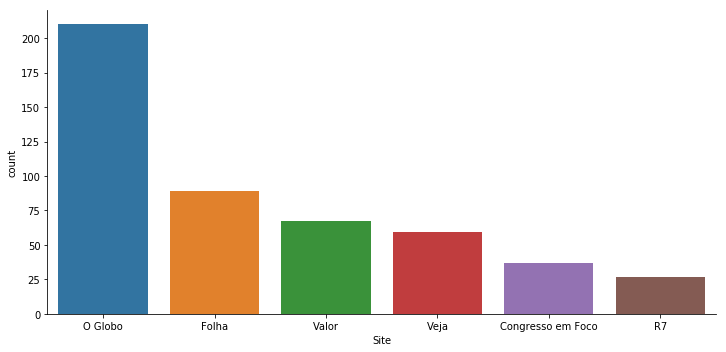

In [25]:
sns.catplot(data=df, x="Site", kind="count", order=ordem_grafico, aspect=2)

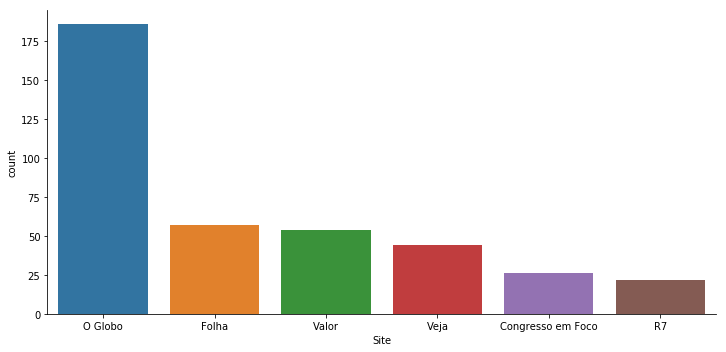

In [26]:
sns.catplot(data=df_com_bolso, x="Site", kind="count", order=ordem_grafico, aspect=2)

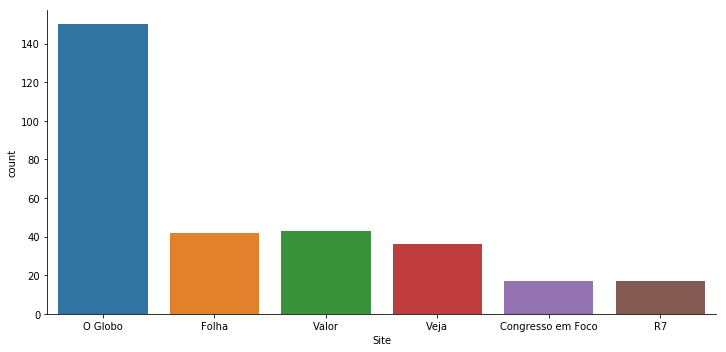

In [27]:
sns.catplot(data=bolso_junto, x="Site", kind="count", order=ordem_grafico, aspect=2)

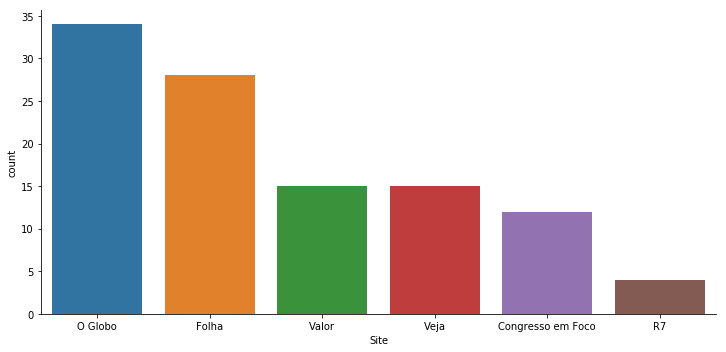

In [28]:
sns.catplot(data=bolso_separado, x="Site", kind="count", order=ordem_grafico, aspect=2)

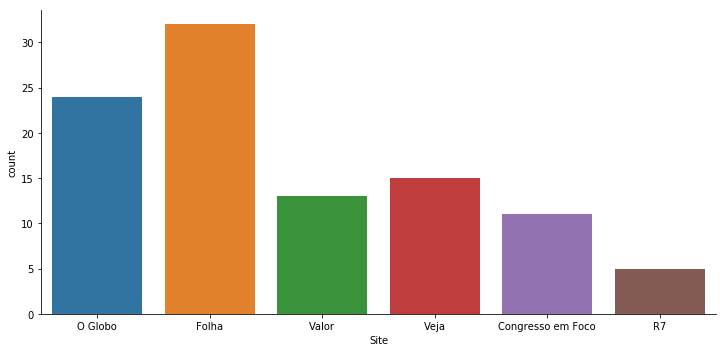

In [29]:
sns.catplot(data=df_sem_bolso, x="Site", kind="count", order=ordem_grafico, aspect=2)

No decorrer de toda a análise a respeito da quantidade de menções aos nomes dos personagens, a sequência de portais se manteve a mesma. A Folha de SP e a Veja, entretanto, parecem se destacar aos demais quando **não há** menção ao sobrenome da família em nenhum lugar da manchete.

In [89]:
line_df = df.groupby(["Mês", "Site"]).Mês.count().unstack("Site")

In [90]:
line_df_com_bolso = df_com_bolso.groupby(["Mês", "Site"]).Mês.count().unstack("Site")

In [92]:
line_bolso_junto = bolso_junto.groupby(["Mês", "Site"]).Mês.count().unstack("Site")

In [93]:
line_bolso_separado = bolso_separado.groupby(["Mês", "Site"]).Mês.count().unstack("Site")

In [95]:
line_sem_bolso = df_sem_bolso.groupby(["Mês", "Site"]).Mês.count().unstack("Site")

Text(0.5,1,'Sem Bolsonaro')

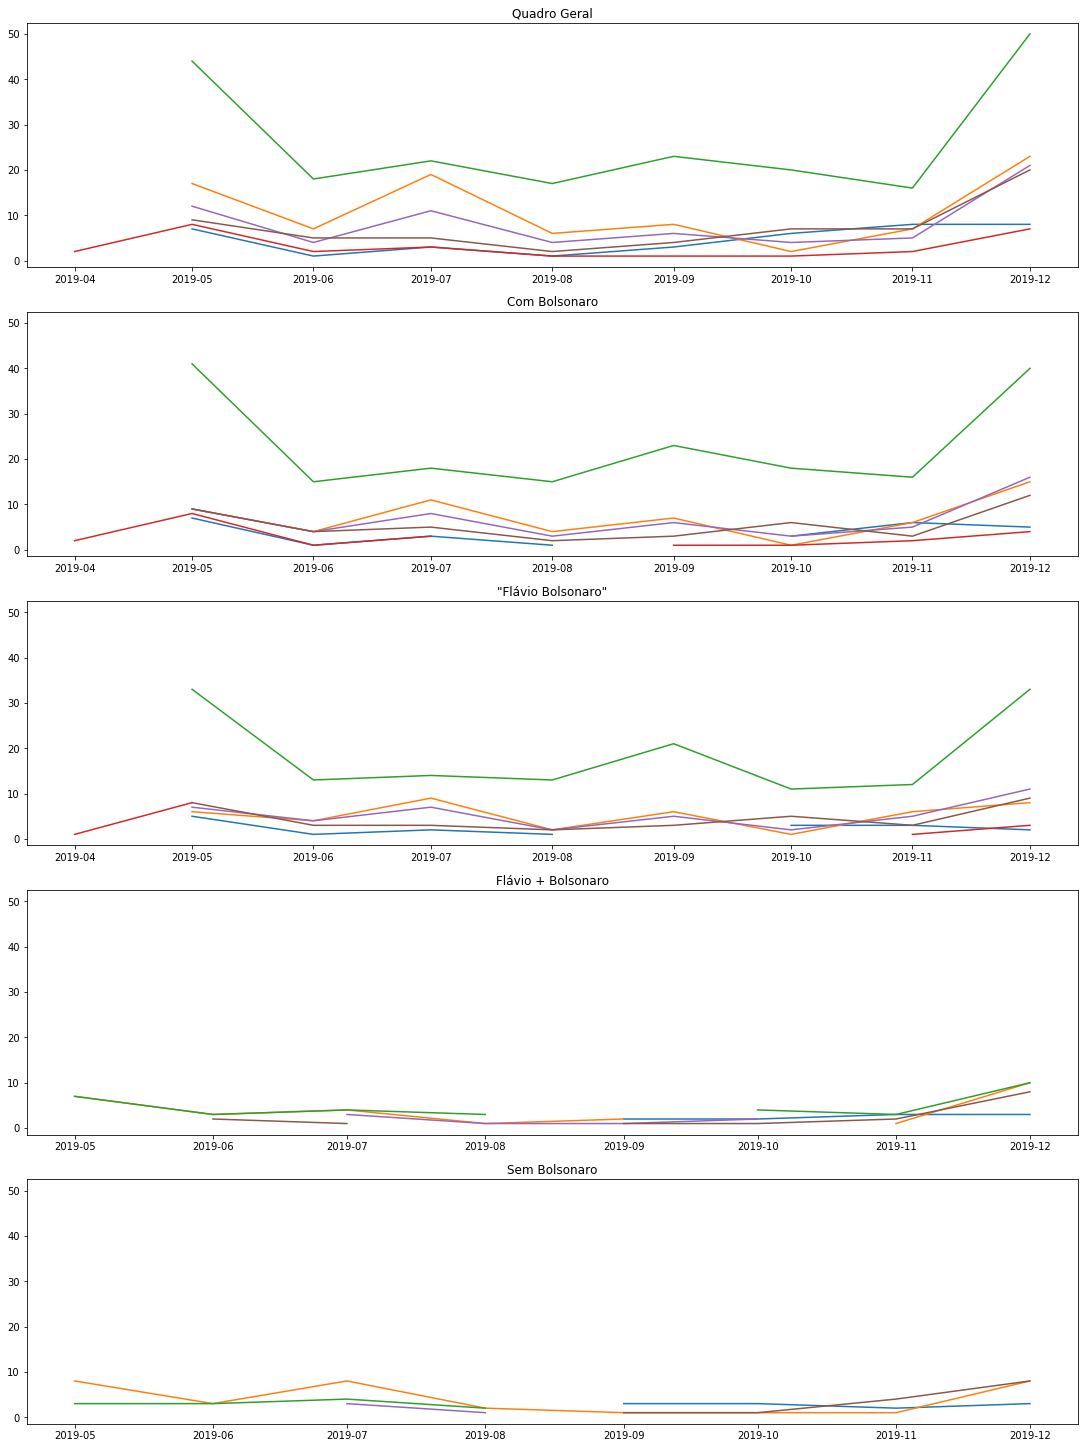

In [151]:
fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(15, 20), sharey=True)
axs[0].plot(line_df)
axs[0].set_title("Quadro Geral")

axs[1].plot(line_df_com_bolso)
axs[1].set_title("Com Bolsonaro")

axs[2].plot(line_bolso_junto)
axs[2].set_title('"Flávio Bolsonaro"')

axs[3].plot(line_bolso_separado)
axs[3].set_title("Flávio + Bolsonaro")

axs[4].plot(line_sem_bolso)
axs[4].set_title("Sem Bolsonaro")

Corroborando com os achados de Marcelo Soares, parece não haver uma tendência de diminuição de noticiar acontecimentos utilizando o nome completo do Senador, ou ainda excluir o sobrenome da família de qualquer parte da manchete.

Títulos de matérias que não trazem o nome *Bolsonaro* existem, entretanto são, diante do quadro geral, a minoria.